# RECOMMENDER USING NLP ON PRODUCT TITLE

5 phases
  1. Import libraries and loading dataset
  2. Preparing dataset by data exploration and clean-up
  3. Data preprocessing using Stop-word removal
  4. Creating IDF weighted Word2Vec for title and Brand using One Hot Encoder


## 1 Importing Libraries and Preparing Dataset 

### 1.1 Importing Libraries

In [3]:
# disable auto-scrolling

%%javascript
IPython.OutputArea.prototype._should_scroll = 9999;

UsageError: Line magic function `%%javascript` not found.


In [4]:
from PIL import Image as PilImage
import itertools
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import gzip
import json
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
from sklearn.feature_extraction.text import CountVectorizer
import pickle
#Deep-Learning Library
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

from IPython.display import display, Image, SVG, Math, YouTubeVideo

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")


Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

### 1.2 Loading Dataset

In [5]:
path = '../Data/meta_Clothing_Shoes_and_Jewelry.json.gz'

In [6]:
f = gzip.open(path, 'rt', encoding='utf8')

lines = []
lines.append(f.readline())
lines

['{"category": ["Clothing, Shoes & Jewelry", "Costumes & Accessories", "Kids & Baby", "Girls", "Accessories", "3 layers of tulle", "6\\" long, stretched waist measures 11 1/2\\" across. Fits up to 7 years.", "Sequins line the edge of the tulle on the top layer.", "Great for babys up to about age 7", "Makes a Great gift for any princess"], "description": ["6\\" long, stretched waist measures 11 1/2\\" across. Fits up to 7 years."], "title": "Purple Sequin Tiny Dancer Tutu Ballet Dance Fairy Princess Costume Accessory", "brand": "Big Dreams", "feature": ["3 layers of tulle", "6\\" long, stretched waist measures 11 1/2\\" across. Fits up to 7 years.", "Sequins line the edge of the tulle on the top layer.", "Great for babys up to about age 7", "Makes a Great gift for any princess"], "rank": "19,963,069inClothing,ShoesJewelry(", "date": "5 star5 star (0%)", "asin": "0000037214"}\n']

In [7]:
# load json

dataset = []
for i in range(50000):
    dataset.append(json.loads(f.readline()))

In [8]:
# turn dataset into a dataframe
data = pd.DataFrame.from_dict(dataset)

In [9]:
data.head()

,category,description,title,image,brand,feature,rank,date,asin,also_view,price,fit,also_buy,main_cat,tech1,details,similar_item,tech2
0,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",[The Hottest Bag in Town! Brand: Anello Condit...,Japan Anello Backpack Unisex LARGE LIGHT GRAY ...,[https://images-na.ssl-images-amazon.com/image...,Anello,"[Polyester Canvas Waterproof, Imported, Size: ...","4,537,420inClothing,ShoesJewelry(",5 star,0201377179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",[The Hottest Bag in Town! Brand: Anello Condit...,Japan Anello Backpack Unisex PINK BEIGE LARGE ...,[https://images-na.ssl-images-amazon.com/image...,Anello,"[PU Leather, Imported, Size: Large PU Leather ...","3,994,472inClothing,ShoesJewelry(",5 star,0204444454,"[B07CJF5HLR, B01EBI8UH6, B01N1LR908, B074M4QKG...",$70.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[Clothing, Shoes & Jewelry, Luggage & Travel G...",[The Hottest Bag in Town! Brand: Anello Condit...,Japan Anello Backpack Unisex BLACK LARGE PU LE...,[https://images-na.ssl-images-amazon.com/image...,Anello,"[PU Leather, Imported, Size: Large PU Leather ...","635,761inClothing,ShoesJewelry(",5 star,0204444403,"[B01DLVYOPG, B07CJF5HLR, B01MSS59Y6, B071YBC1J...",$65.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[Clothing, Shoes & Jewelry, Novelty & More, Cl...",[Brand New. Hat Centre Length: adult about 8c...,bettyhome Unisex Adult Winter Spring Thicken C...,[https://images-na.ssl-images-amazon.com/image...,bettyhome,"[Imported, Plush,Cotton, Polyester, Lovely for...","5,061,041inClothing,ShoesJewelry(",5 star5 star (0%),0206313535,"[B00VGT93YS, B07FTY87LM, B01IKVOY8E, B01GF6C6F...",$18.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[Clothing, Shoes & Jewelry, Women, Clothing, S...",[Please allow 1-2cm dimension deviation. 100% ...,bettyhome Womens Lace Short Sleeves Top Printi...,[https://images-na.ssl-images-amazon.com/image...,bettyhome,"[Imported, Bohemia style, butterfly printing, ...","10,635,107inClothing,ShoesJewelry(",5 star,0206335962,NaN,$23.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# look at the columns of the dataframe
data.columns

Index(['category', 'description', 'title', 'image', 'brand', 'feature', 'rank',
       'date', 'asin', 'also_view', 'price', 'fit', 'also_buy', 'main_cat',
       'tech1', 'details', 'similar_item', 'tech2'],
      dtype='object')

In [11]:
data['similar_item']

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
49995    NaN
49996    NaN
49997    NaN
49998    NaN
49999    NaN
Name: similar_item, Length: 50000, dtype: object

## 2 Preparing Data

### 2.1 Removing Unnecessary features and Nan rows

In [12]:
# load only necessary columns for the model
data = data[['asin', 'brand', 'description', 'feature','image', 'title', 'price']]
print(data.head())
print(data.shape)

         asin      brand                                        description  \
0  0201377179     Anello  [The Hottest Bag in Town! Brand: Anello Condit...   
1  0204444454     Anello  [The Hottest Bag in Town! Brand: Anello Condit...   
2  0204444403     Anello  [The Hottest Bag in Town! Brand: Anello Condit...   
3  0206313535  bettyhome  [Brand New.  Hat Centre Length: adult about 8c...   
4  0206335962  bettyhome  [Please allow 1-2cm dimension deviation. 100% ...   

                                             feature  \
0  [Polyester Canvas Waterproof, Imported, Size: ...   
1  [PU Leather, Imported, Size: Large PU Leather ...   
2  [PU Leather, Imported, Size: Large PU Leather ...   
3  [Imported, Plush,Cotton, Polyester, Lovely for...   
4  [Imported, Bohemia style, butterfly printing, ...   

                                               image  \
0  [https://images-na.ssl-images-amazon.com/image...   
1  [https://images-na.ssl-images-amazon.com/image...   
2  [https://images-n

In [13]:
# remove rows without images

data = data.dropna(subset=['image'])
data.shape

(31166, 7)

In [14]:
# only take the first image available for each product

data.loc[:, 'image'] = data['image'].map(lambda x: x[0])

In [15]:
pd.set_option('display.max_colwidth', -1)
print(data.loc[:,'image'])

0        https://images-na.ssl-images-amazon.com/images/I/51RJoBQ2ANL._SR38,50_.jpg               
1        https://images-na.ssl-images-amazon.com/images/I/518UiiWp-vL._SR38,50_.jpg               
2        https://images-na.ssl-images-amazon.com/images/I/514s3E59F1L._SR38,50_.jpg               
3        https://images-na.ssl-images-amazon.com/images/I/51ALk5zBu2L._SX38_SY50_CR,0,0,38,50_.jpg
4        https://images-na.ssl-images-amazon.com/images/I/51HNh00jdGL._SR38,50_.jpg               
                                            ...                                                   
49993    https://images-na.ssl-images-amazon.com/images/I/41i3H6UAK2L._US40_.jpg                  
49995    https://images-na.ssl-images-amazon.com/images/I/41o0AlPMCbL._US40_.jpg                  
49996    https://images-na.ssl-images-amazon.com/images/I/31QrWsBWVdL._US40_.jpg                  
49998    https://images-na.ssl-images-amazon.com/images/I/41m1bAx61CL._US40_.jpg                  
49999    h

### 1.3 Data Exploration

In [16]:
print(data['brand'].describe())

count     20985            
unique    2344             
top       Amazon Collection
freq      1092             
Name: brand, dtype: object


In [17]:
brand_count = Counter(list(data['brand']))
brand_count.most_common(10)

[(nan, 10181),
 ('Amazon Collection', 1092),
 ('Silver Insanity', 611),
 ('Seiko', 403),
 ('Timex', 349),
 ('Birkenstock', 307),
 ('Invicta', 261),
 ('Rothco', 236),
 ('Gem Avenue', 206),
 ('Casio', 196)]

In [18]:
print(data['title'].describe())

count     31166                                      
unique    27069                                      
top       Rainbow Sandals Double Layer Leather Sandal
freq      46                                         
Name: title, dtype: object


In [19]:
data = data.loc[~data['title'].isnull()]
data.shape

(31166, 7)

In [20]:
data.columns

Index(['asin', 'brand', 'description', 'feature', 'image', 'title', 'price'], dtype='object')

In [21]:
data = data.loc[~data['image'].isnull()]
data.shape

(31166, 7)

### 2.3 Removing duplicates for 'Title'

In [22]:
print(sum(data.duplicated('title')))

4097


In [23]:
# Remove All products with very few words in title
data_sorted = data[data['title'].apply(lambda x: len(x.split())>4)]
print("After removal of products with short description:", data_sorted.shape[0])

After removal of products with short description: 27440


In [24]:
indices = []
for i,row in data_sorted.iterrows():
    indices.append(i)
stage1_dedupe_asins = []
i = 0
j = 0
num_data_points = data_sorted.shape[0]
while i < num_data_points and j < num_data_points:
    
    previous_i = i

    # store the list of words of ith string in a, ex: a = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'X-Large']
    a = data['title'].loc[indices[i]].split()

    # search for the similar products sequentially 
    j = i+1
    while j < num_data_points:

        # store the list of words of jth string in b, ex: b = ['tokidoki', 'The', 'Queen', 'of', 'Diamonds', 'Women's', 'Shirt', 'Small']
        b = data['title'].loc[indices[j]].split()

        # store the maximum length of two strings
        length = max(len(a), len(b))

        # count is used to store the number of words that are matched in both strings
        count  = 0

        # itertools.zip_longest(a,b): will map the corresponding words in both strings, it will appened None in case of unequal strings
        # example: a =['a', 'b', 'c', 'd']
        # b = ['a', 'b', 'd']
        # itertools.zip_longest(a,b): will give [('a','a'), ('b','b'), ('c','d'), ('d', None)]
        for k in itertools.zip_longest(a,b): 
            if (k[0] == k[1]):
                count += 1

        # if the number of words in which both strings differ are > 2 , we are considering it as those two apperals are different
        # if the number of words in which both strings differ are < 2 , we are considering it as those two apperals are same, hence we are ignoring them
        if (length - count) > 2: # number of words in which both sensences differ
            # if both strings are differ by more than 2 words we include the 1st string index
            stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[i]])

            # if the comaprision between is between num_data_points, num_data_points-1 strings and they differ in more than 2 words we include both
            if j == num_data_points-1: stage1_dedupe_asins.append(data_sorted['asin'].loc[indices[j]])

            # start searching for similar apperals corresponds 2nd string
            i = j
            break
        else:
            j += 1
    if previous_i == i:
        break

In [25]:
data = data.loc[data['asin'].isin(stage1_dedupe_asins)]
print('Number of data points : ', data.shape[0])

Number of data points :  26111


In [26]:
data.head()

,asin,brand,description,feature,image,title,price
0,0201377179,Anello,"[The Hottest Bag in Town! Brand: Anello Condition: 100% brand new Size: Large Simplistic Japanese design to add spark to your style! Main compartment with a large capacity can fit numerous items! - a front zip pocket - 2 interior open pockets - bottle pocket on both sides - a zipper at the back - Made of lightweight, durable and waterproof fabric! - Roomy main compartment and multiple pockets for functionally - Comes with adjustable double shoulder straps and double top handles - Simple and stylish design that goes well with most outfits. Specifications: Size: approx. H 40 x W 26 x D 20cm Shoulder straps length: approx. 38-80cm (adjustable) Weight: approx. 650g Material: 600DOxford]","[Polyester Canvas Waterproof, Imported, Size: Large (H 40 x W 26 x D 20cm), Color: LIGHT GRAY & BLACK | Condition: 100% brand new, - Made of lightweight, durable and waterproof fabric, - Roomy main compartment and multiple pockets for functionally, - a front zip pocket, 2 interior open pockets, bottle pocket on both sides, a zipper at the back. Adjustable double shoulder straps and double top handles, Product Dimensions:\n \n15.8 x 7.9 x 10.2 inches, Shipping Weight:\n \n1.87 pounds]","https://images-na.ssl-images-amazon.com/images/I/51RJoBQ2ANL._SR38,50_.jpg",Japan Anello Backpack Unisex LARGE LIGHT GRAY BLACK Rucksack Waterproof Canvas Bag,NaN
1,0204444454,Anello,"[The Hottest Bag in Town! Brand: Anello Condition: 100% brand new Size: LARGE SIZE Material: PU Leather Simplistic Japanese design to add spark to your style! Main compartment with a large capacity can fit numerous items! Comes with a front zip pocket, 2 interior open pockets, 2 side bottle pockets and a zipper at the back! Made of stylish, elegant and durable PU leather fabric! - Roomy main compartment and multiple pockets for functionally - Comes with adjustable double shoulder straps and double top handles - Simple and stylish design that goes well with most outfits - Made of stylish, elegant and durable and PU leather fabric. Specifications: Size: approx. H 39 x W 26 x D 16cm Shoulder straps length: up to 84cm (adjustable) Weight: approx. 800g Material: PU Leather]","[PU Leather, Imported, Size: Large PU Leather (H 39 x W 26 x D 16cm) Model: AT-B01211, Color: PINK BEIGE | Condition: 100% brand new, - Made of stylish, elegant and durable and PU leather fabric, - Roomy main compartment and multiple pockets for functionally, - a front zip pocket, 2 interior open pockets, bottle pocket on both sides, a zipper at the back. Adjustable double shoulder straps and double top handles, Product Dimensions:\n \n15.3 x 6.3 x 10.2 inches, Shipping Weight:\n \n1.98 pounds (View shipping rates and policies)]","https://images-na.ssl-images-amazon.com/images/I/518UiiWp-vL._SR38,50_.jpg",Japan Anello Backpack Unisex PINK BEIGE LARGE PU LEATHER Rucksack School Bag Campus,$70.00
2,0204444403,Anello,"[The Hottest Bag in Town! Brand: Anello Condition: 100% brand new Size: LARGE SIZE Material: PU Leather Simplistic Japanese design to add spark to your style! Main compartment with a large capacity can fit numerous items! Comes with a front zip pocket, 2 interior open pockets, 2 side bottle pockets and a zipper at the back! Made of stylish, elegant and durable PU leather fabric! - Roomy main compartment and multiple pockets for functionally - Comes with adjustable double shoulder straps and double top handles - Simple and stylish design that goes well with most outfits - Made of stylish, elegant and durable and PU leather fabric. Specifications: Size: approx. H 39 x W 26 x D 16cm Shoulder straps length: up to 84cm (adjustable) Weight: approx. 800g Material: PU Leather]","[PU Leather, Imported, Size: Large PU Leather (H 39 x W 26 x D 16cm) Model: AT-B01211, Color: BLACK | Condition: 100% brand new, - Made of stylish, elegant and durable and PU leather fabric, - Roomy main compartment and multiple pockets for functionally, - a front zip po

## 3 Data Preprocessing by Removing Stop Words

In [27]:
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)
def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

list of stop words: {"won't", 'them', "you're", 'until', 'an', 'be', 's', 'were', "isn't", 'by', 'few', 'again', "mightn't", 'nor', 'theirs', 'those', 'you', 'up', 'doing', 'too', 'below', "didn't", 'while', 'hadn', 'into', 'needn', 'do', "don't", 'the', 'all', "aren't", 'itself', 'only', 'mustn', 'not', 'both', 'he', "couldn't", 'most', 'through', 'won', 'having', 'her', 'themselves', 'over', 'ain', "you've", 'at', 'have', 'there', 'own', "hasn't", "wouldn't", 'very', 'is', 'its', 'wasn', 'how', 'doesn', 'will', 'of', 'don', 'then', "doesn't", "weren't", 'and', 'm', 'our', 'whom', 'yours', 'further', 'for', 'when', 'hasn', 'being', 'these', 'himself', 'against', 'so', 're', "needn't", "shan't", 'more', 'such', "mustn't", 'who', 'i', 'off', 'if', "that'll", 'about', 'to', 'shan', "it's", 'had', 'ma', 'was', 'she', 'on', 'now', "you'll", "she's", 't', "shouldn't", 'has', 'as', 'didn', 'same', 'under', 'shouldn', "you'd", 'll', "should've", 'from', 'some', 'it', 'yourself', 'each', 'they

In [28]:
start_time = time.clock()
# we take each title and we text-preprocess it.
for index, row in data.iterrows():
    nlp_preprocessing(row['title'], index, 'title')
# we print the time it took to preprocess whole titles 
print(time.clock() - start_time, "seconds")

18.297195 seconds


In [29]:
data.head()

,asin,brand,description,feature,image,title,price
0,0201377179,Anello,"[The Hottest Bag in Town! Brand: Anello Condition: 100% brand new Size: Large Simplistic Japanese design to add spark to your style! Main compartment with a large capacity can fit numerous items! - a front zip pocket - 2 interior open pockets - bottle pocket on both sides - a zipper at the back - Made of lightweight, durable and waterproof fabric! - Roomy main compartment and multiple pockets for functionally - Comes with adjustable double shoulder straps and double top handles - Simple and stylish design that goes well with most outfits. Specifications: Size: approx. H 40 x W 26 x D 20cm Shoulder straps length: approx. 38-80cm (adjustable) Weight: approx. 650g Material: 600DOxford]","[Polyester Canvas Waterproof, Imported, Size: Large (H 40 x W 26 x D 20cm), Color: LIGHT GRAY & BLACK | Condition: 100% brand new, - Made of lightweight, durable and waterproof fabric, - Roomy main compartment and multiple pockets for functionally, - a front zip pocket, 2 interior open pockets, bottle pocket on both sides, a zipper at the back. Adjustable double shoulder straps and double top handles, Product Dimensions:\n \n15.8 x 7.9 x 10.2 inches, Shipping Weight:\n \n1.87 pounds]","https://images-na.ssl-images-amazon.com/images/I/51RJoBQ2ANL._SR38,50_.jpg",japan anello backpack unisex large light gray black rucksack waterproof canvas bag,NaN
1,0204444454,Anello,"[The Hottest Bag in Town! Brand: Anello Condition: 100% brand new Size: LARGE SIZE Material: PU Leather Simplistic Japanese design to add spark to your style! Main compartment with a large capacity can fit numerous items! Comes with a front zip pocket, 2 interior open pockets, 2 side bottle pockets and a zipper at the back! Made of stylish, elegant and durable PU leather fabric! - Roomy main compartment and multiple pockets for functionally - Comes with adjustable double shoulder straps and double top handles - Simple and stylish design that goes well with most outfits - Made of stylish, elegant and durable and PU leather fabric. Specifications: Size: approx. H 39 x W 26 x D 16cm Shoulder straps length: up to 84cm (adjustable) Weight: approx. 800g Material: PU Leather]","[PU Leather, Imported, Size: Large PU Leather (H 39 x W 26 x D 16cm) Model: AT-B01211, Color: PINK BEIGE | Condition: 100% brand new, - Made of stylish, elegant and durable and PU leather fabric, - Roomy main compartment and multiple pockets for functionally, - a front zip pocket, 2 interior open pockets, bottle pocket on both sides, a zipper at the back. Adjustable double shoulder straps and double top handles, Product Dimensions:\n \n15.3 x 6.3 x 10.2 inches, Shipping Weight:\n \n1.98 pounds (View shipping rates and policies)]","https://images-na.ssl-images-amazon.com/images/I/518UiiWp-vL._SR38,50_.jpg",japan anello backpack unisex pink beige large pu leather rucksack school bag campus,$70.00
2,0204444403,Anello,"[The Hottest Bag in Town! Brand: Anello Condition: 100% brand new Size: LARGE SIZE Material: PU Leather Simplistic Japanese design to add spark to your style! Main compartment with a large capacity can fit numerous items! Comes with a front zip pocket, 2 interior open pockets, 2 side bottle pockets and a zipper at the back! Made of stylish, elegant and durable PU leather fabric! - Roomy main compartment and multiple pockets for functionally - Comes with adjustable double shoulder straps and double top handles - Simple and stylish design that goes well with most outfits - Made of stylish, elegant and durable and PU leather fabric. Specifications: Size: approx. H 39 x W 26 x D 16cm Shoulder straps length: up to 84cm (adjustable) Weight: approx. 800g Material: PU Leather]","[PU Leather, Imported, Size: Large PU Leather (H 39 x W 26 x D 16cm) Model: AT-B01211, Color: BLACK | Condition: 100% brand new, - Made of stylish, elegant and durable and PU leather fabric, - Roomy main compartment and multiple pockets for functionally, - a front zip po

In [30]:
print(data.shape[0])

26111


In [31]:
title_vectorizer = CountVectorizer()
title_features   = title_vectorizer.fit_transform(data['title'])
title_features.get_shape()

(26111, 20255)

## 4 Creating the IDF weighted Word2Vec Title, Brand Using One Hot Encoder

### Defining the features 

### 4.1 IDF Title Features and W2V Title Features

In [32]:
idf_title_vectorizer = CountVectorizer()
idf_title_features = idf_title_vectorizer.fit_transform(data['title'])


#### Defining the Features for Brands and Color 

In [33]:
# some of the brand values are empty. 
# Need to replace Null with string "NULL"
data['brand'].fillna(value="Not given", inplace=True )

# replace spaces with hypen
brands = [x.replace(" ", "-") for x in data['brand'].values]

# colors = [x.replace(" ", "-") for x in data['color'].values]

#One-Hot Encoding using Count vectorizer
brand_vectorizer = CountVectorizer()
brand_features = brand_vectorizer.fit_transform(brands)

# color_vectorizer = CountVectorizer()
# color_features = color_vectorizer.fit_transform(colors)

#### Defining the Features for Visuals

In [34]:
#load the features and corresponding ASINS info.
bottleneck_features_train = np.load('Apparel-Recommendation-System-master/data_1_cnn_features.npy')
asins = np.load('Apparel-Recommendation-System-master/data_1_cnn_feature_asins.npy')
asins = list(asins)

# load the original 16K dataset
# data = pd.read_pickle('pickels/16k_apperal_data_preprocessed')
df_asins = list(data['asin'])

#### 4.1.1 Utility Functions for the IDF Word2Vec Weighted Title

In [35]:
word2vec_model = r'Apparel-Recommendation-System-master/word2vec_model'

In [36]:
def get_word_vec(sentence, doc_id, m_name):
    # sentence : title of the apparel
    # doc_id: document id in our corpus
    # m_name: model information it will take two values
        # if  m_name == 'avg', we will append the model[i], w2v representation of word i
        # if m_name == 'weighted', we will multiply each w2v[word] with the idf(word)
    vec = []
    for i in sentence.split():
        if i in vocab:
            if m_name == 'weighted' and i in  idf_title_vectorizer.vocabulary_:
                vec.append(idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[i]] * model[i])
            elif m_name == 'avg':
                vec.append(model[i])
        else:
            # if the word in our courpus is not there in the google word2vec corpus,just ignoring it
            vec.append(np.zeros(shape=(300,)))
    # return a numpy array of shape (#number of words in title * 300 ) 300 = len(w2v_model[word])
    # each row represents the word2vec representation of each word (weighted/avg) in given sentance 
    return  np.array(vec)

In [37]:
# this function will add the vectors of each word and returns the avg vector of given sentance
def build_avg_vec(sentence, num_features, doc_id, m_name):
    # sentace: its title of the apparel
    # num_features: the lenght of word2vec vector, its values = 300
    # m_name: model information it will take two values
        # if  m_name == 'avg',append the model[i], w2v representation of word i
        # if m_name == 'weighted',multiply each w2v[word] with the idf(word)

    featureVec = np.zeros((num_features,), dtype="float32")
    #intialize a vector of size 300 with all zeros
    #add each word2vec(wordi) to this fetureVec
    nwords = 0
    
    for word in sentence.split():
        nwords += 1
        if word in vocab:
            if m_name == 'weighted' and word in  idf_title_vectorizer.vocabulary_:
                featureVec = np.add(featureVec, idf_title_features[doc_id, idf_title_vectorizer.vocabulary_[word]] * model[word])
            elif m_name == 'avg':
                featureVec = np.add(featureVec, model[word])
    if(nwords>0):
        featureVec = np.divide(featureVec, nwords)
    # returns the avg vector of given sentance, its of shape (1, 300)
    return featureVec

In [38]:
data.to_pickle('pickles/26K_data')

In [39]:
data = pd.read_pickle('pickles/26K_data')

In [40]:
with open(word2vec_model, 'rb') as handle:
    model = pickle.load(handle)
# vocab = stores all the words that are there in google w2v model
vocab = model.keys()
doc_id = 0
w2v_title_weight = []
# for every title build a weighted vector representation
for i in data['title']:
    w2v_title_weight.append(build_avg_vec(i, 300, doc_id,'weighted'))
    doc_id += 1
# w2v_title = np.array(# number of doc in courpus * 300), each row corresponds to a doc 
w2v_title_weight = np.array(w2v_title_weight)

In [41]:
def n_containing(word):
    # return the number of documents which had the given word
    return sum(1 for blob in data['title'] if word in blob.split())

def idf(word):
    # idf = log(#number of docs / #number of docs which had the given word)
    return math.log(data.shape[0] / (n_containing(word)))

In [42]:
data.to_pickle('pickles/26K_data')

In [43]:
data = pd.read_pickle('pickles/26K_data')

In [44]:
# need to convert the values into float
idf_title_features  = idf_title_features.astype(np.float)

for i in idf_title_vectorizer.vocabulary_.keys():
    # for every word in whole corpus will find its idf value
    idf_val = idf(i)
    
    # to calculate idf_title_features need to replace the count values with the idf values of the word
    # idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0] will return all documents in which the word i present
    for j in idf_title_features[:, idf_title_vectorizer.vocabulary_[i]].nonzero()[0]:
        
        # replace the count values of word i in document j with  idf_value of word i 
        # idf_title_features[doc_id, index_of_word_in_courpus] = idf value of word
        idf_title_features[j,idf_title_vectorizer.vocabulary_[i]] = idf_val

In [45]:
def get_distance(vec1, vec2):
    # vec1 = np.array(#number_of_words_title1 * 300), each row is a vector of length 300 corresponds to each word in give title
    # vec2 = np.array(#number_of_words_title2 * 300), each row is a vector of length 300 corresponds to each word in give title
    
    final_dist = []
    # for each vector in vec1  caluclate the distance(euclidean) to all vectors in vec2
    for i in vec1:
        dist = []
        for j in vec2:
            # np.linalg.norm(i-j) will result the euclidean distance between vectors i, j
            dist.append(np.linalg.norm(i-j))
        final_dist.append(np.array(dist))
    # final_dist = np.array(#number of words in title1 * #number of words in title2)
    # final_dist[i,j] = euclidean distance between vectors i, j
    return np.array(final_dist)

In [46]:
def display_img(url,ax,fig):
    #get the url of the apparel and download it
    response = requests.get(url)
    img = PilImage.open(BytesIO(response.content))
    #display it in notebook 
    plt.imshow(img)

In [47]:
#The Below code is is for the weighted IDF Word2Vec 
def heat_map_w2v(sentence1, sentence2, url, doc_id1, doc_id2, model):
    # sentance1 : title1, input apparel
    # sentance2 : title2, recommended apparel
    # url: apparel image url
    # doc_id1: document id of input apparel
    # doc_id2: document id of recommended apparel
    # model: it can have two values, 1. avg 2. weighted
    
    #s1_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s1_vec = get_word_vec(sentence1, doc_id1, model)
    #s2_vec = np.array(#number_of_words_title1 * 300), each row is a vector(weighted/avg) of length 300 corresponds to each word in give title
    s2_vec = get_word_vec(sentence2, doc_id2, model)

    # s1_s2_dist = np.array(#number of words in title1 * #number of words in title2)
    # s1_s2_dist[i,j] = euclidean distance between words i, j
    s1_s2_dist = get_distance(s1_vec, s2_vec)

    
    
    # devide whole figure into 2 parts 1st part displays heatmap 2nd part displays image of apparel
    gs = gridspec.GridSpec(2, 2, width_ratios=[4,1],height_ratios=[2,1]) 
    fig = plt.figure(figsize=(15,15))
    
    ax = plt.subplot(gs[0])
    # ploting the heap map based on the pairwise distances
    ax = sns.heatmap(np.round(s1_s2_dist,4), annot=True)
    # set the x axis labels as recommended apparels title
    ax.set_xticklabels(sentence2.split())
    # set the y axis labels as input apparels title
    ax.set_yticklabels(sentence1.split())
    # set title as recommended apparels title
    ax.set_title(sentence2)
    
    ax = plt.subplot(gs[1])
    # remove all grids and axis labels for image
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    display_img(url, ax, fig)
    
    plt.show()

In [48]:
def weighted_w2v_model(doc_id, num_results):
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    # the metric used here is cosine, the coside distance is mesured as K(X, Y) = <X, Y> / (||X||*||Y||)
    # http://scikit-learn.org/stable/modules/metrics.html#cosine-similarity
    pairwise_dist = pairwise_distances(w2v_title_weight, w2v_title_weight[doc_id].reshape(1,-1))

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data.index[indices])
    
    for i in range(0, len(indices)):
        heat_map_w2v(data['title'].loc[df_indices[0]],data['title'].loc[df_indices[i]], data['image'].loc[df_indices[i]], indices[0], indices[i], 'weighted')
        print('ASIN :',data['asin'].loc[df_indices[i]])
        print('Brand :',data['brand'].loc[df_indices[i]])
        print('euclidean distance from input :', pdists[i])
        print('='*125)

In [49]:
from PIL import Image as PilImage

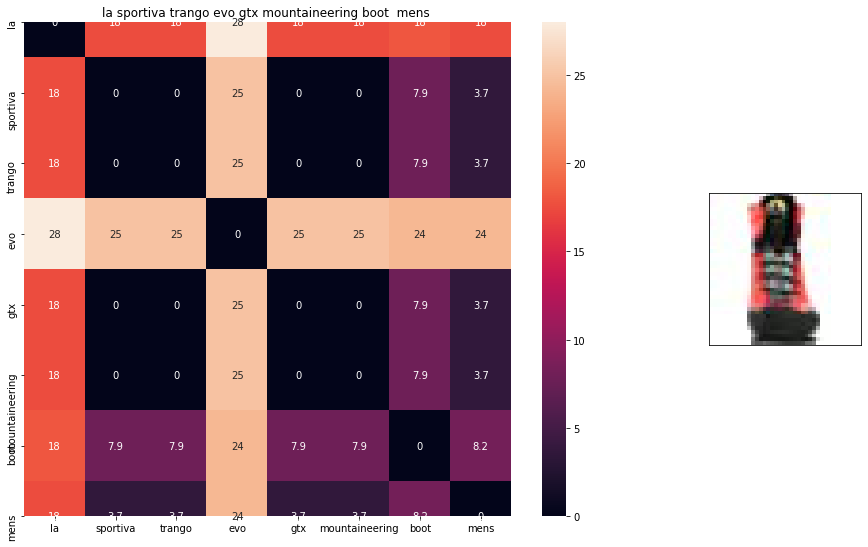

ASIN : B0007DBK40
Brand : Not given
euclidean distance from input : 0.0


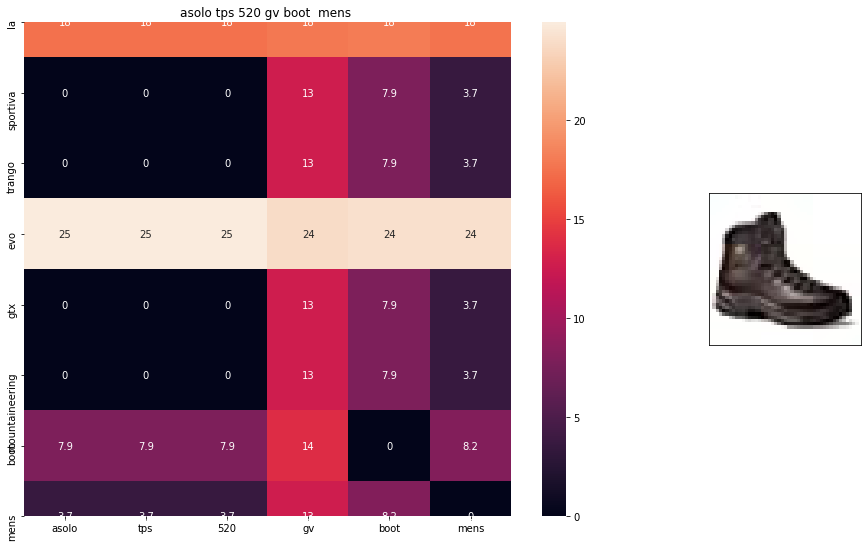

ASIN : B000HX8PCK
Brand : Asolo
euclidean distance from input : 0.48640013


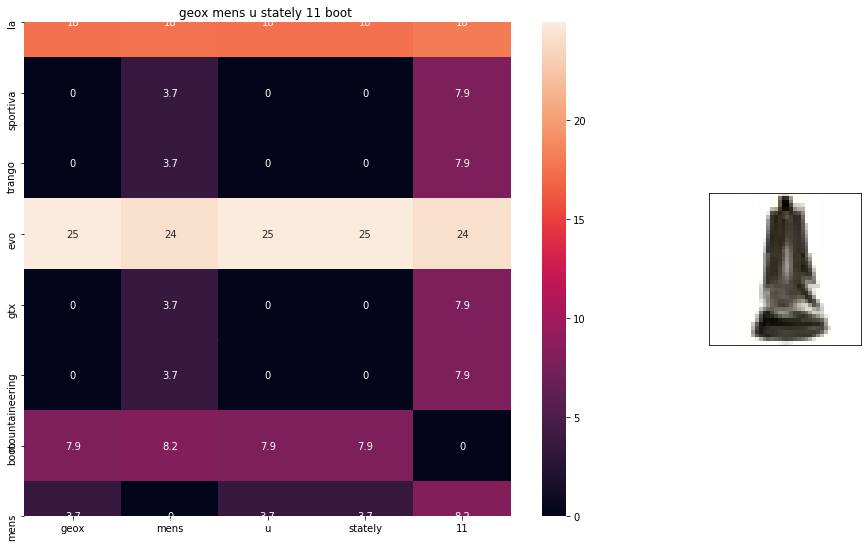

ASIN : B000M4O22G
Brand : Geox
euclidean distance from input : 0.52977276


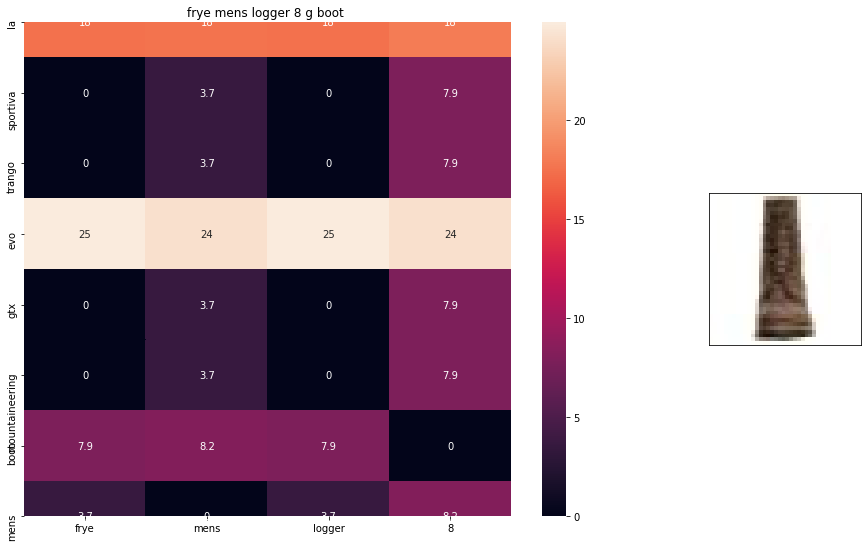

ASIN : B000JFNFGC
Brand : Not given
euclidean distance from input : 0.52977276


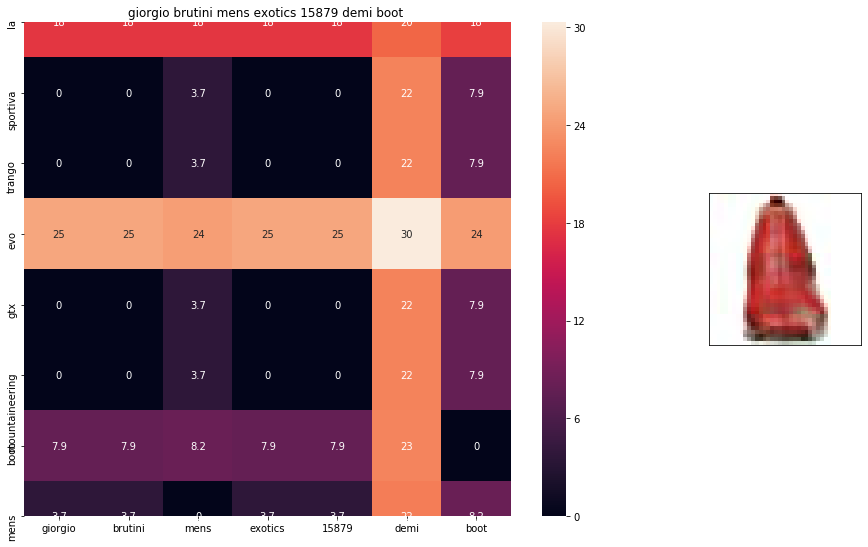

ASIN : B000HE8HTK
Brand : Giorgio Brutini
euclidean distance from input : 0.53207016


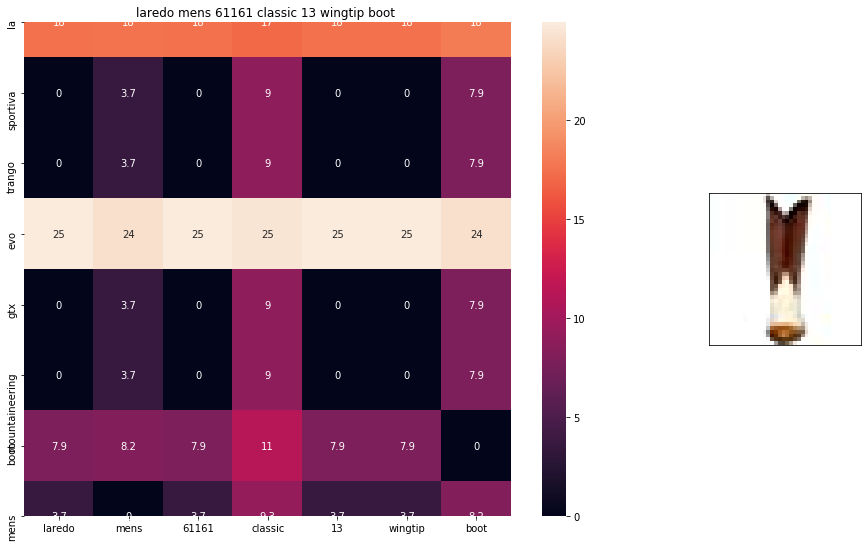

ASIN : B000LYJYHA
Brand : Laredo
euclidean distance from input : 0.53326696


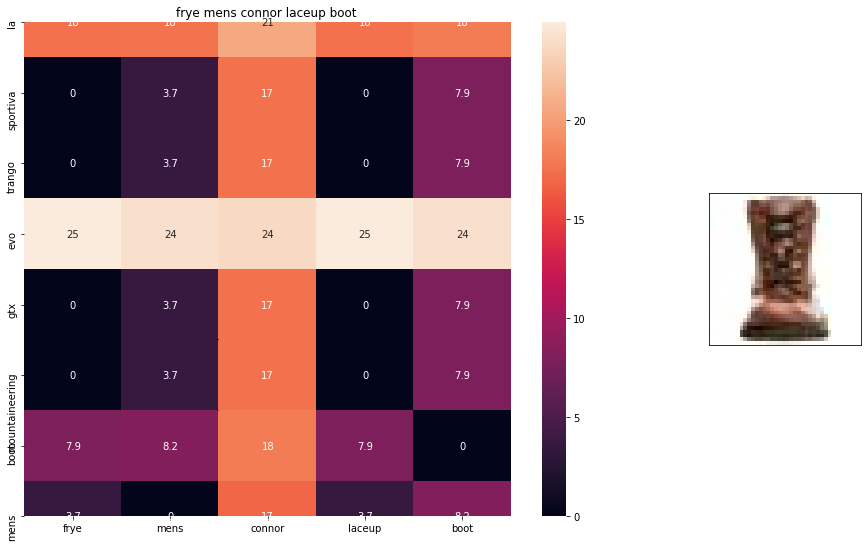

ASIN : B000JFHSME
Brand : Not given
euclidean distance from input : 0.5351773


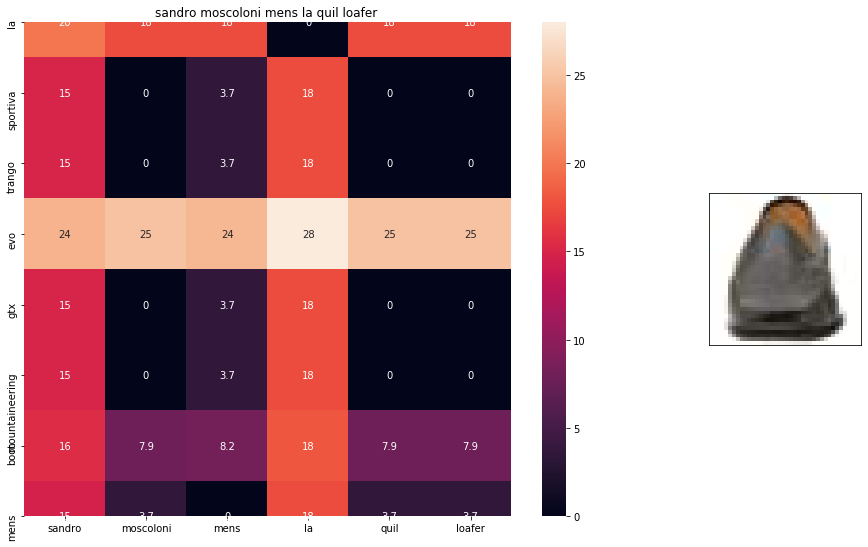

ASIN : B000H0WDWG
Brand : Sandro Moscoloni
euclidean distance from input : 0.5417044


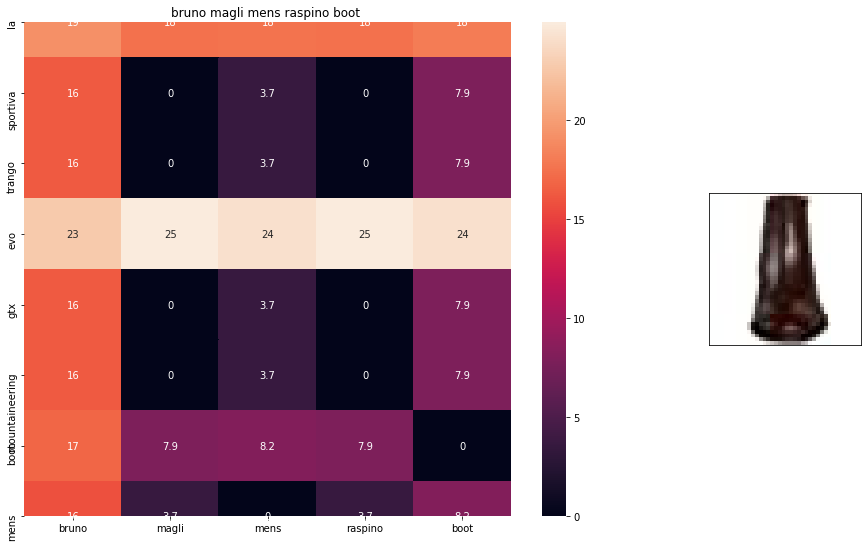

ASIN : B000JIM33A
Brand : Bruno Magli
euclidean distance from input : 0.54311895


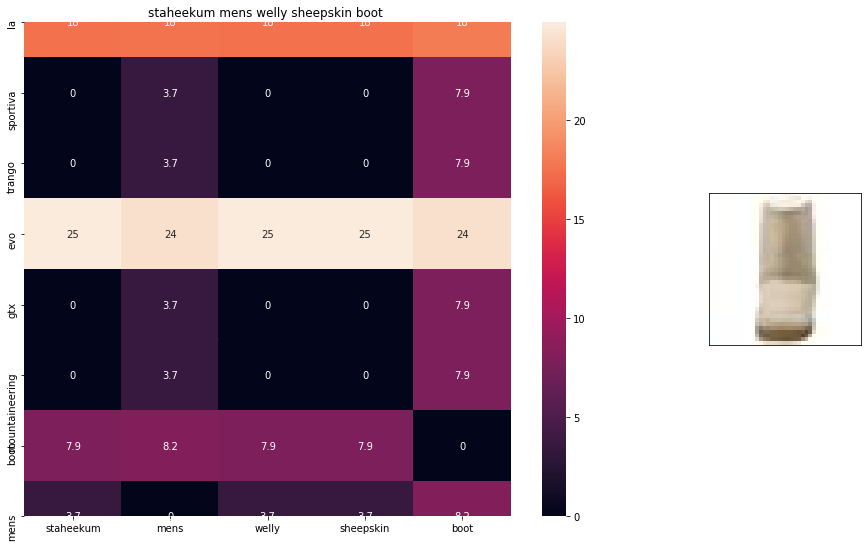

ASIN : B000HRI3UU
Brand : Not given
euclidean distance from input : 0.5438856


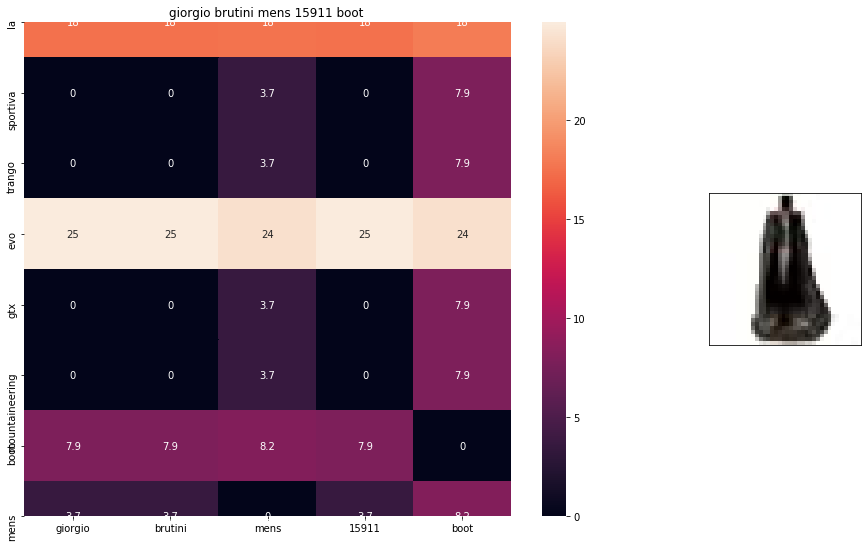

ASIN : B000HE6I6Y
Brand : Giorgio Brutini
euclidean distance from input : 0.5438856


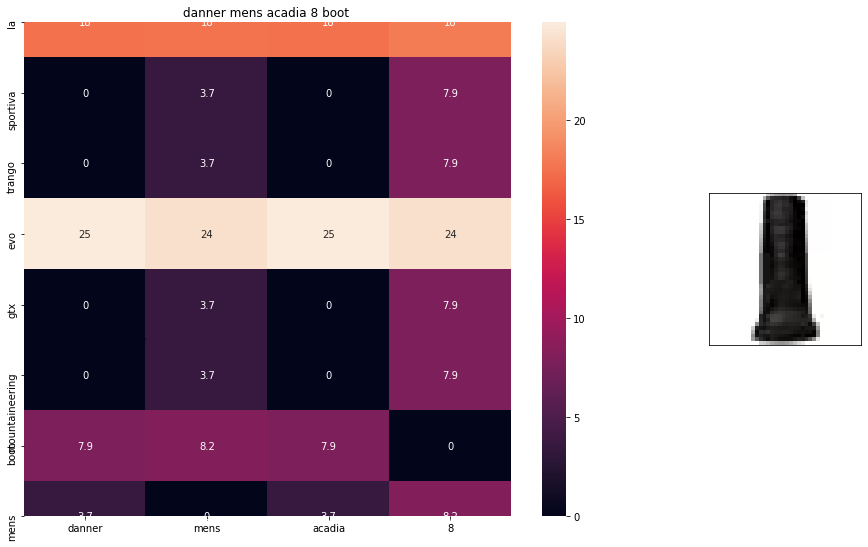

ASIN : B0002L4KA8
Brand : Danner
euclidean distance from input : 0.5438856


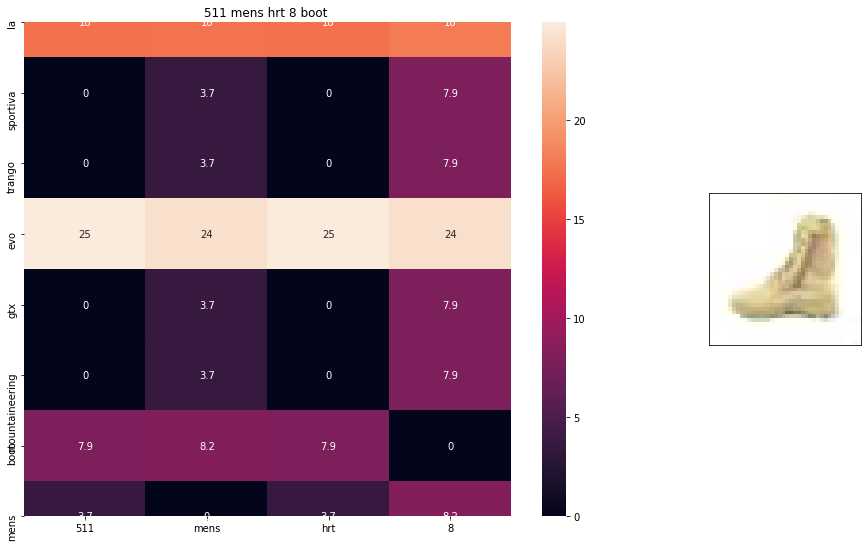

ASIN : B000BPYGRW
Brand : Not given
euclidean distance from input : 0.5438856


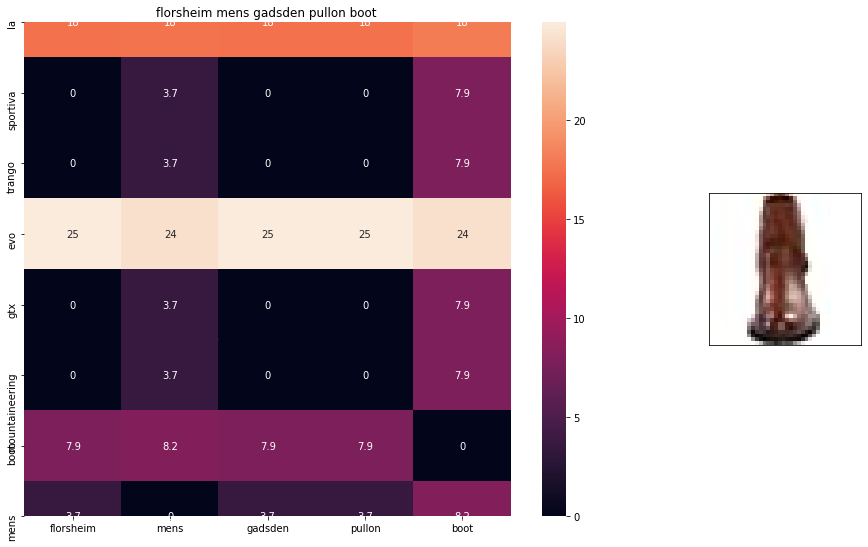

ASIN : B000F81OY8
Brand : Not given
euclidean distance from input : 0.5438856


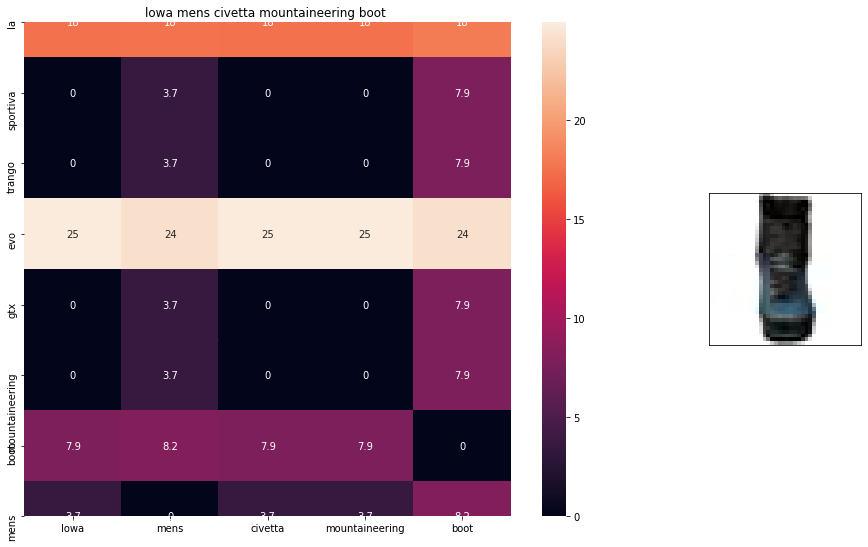

ASIN : B000OG6KAO
Brand : LOWA Boots
euclidean distance from input : 0.5438856


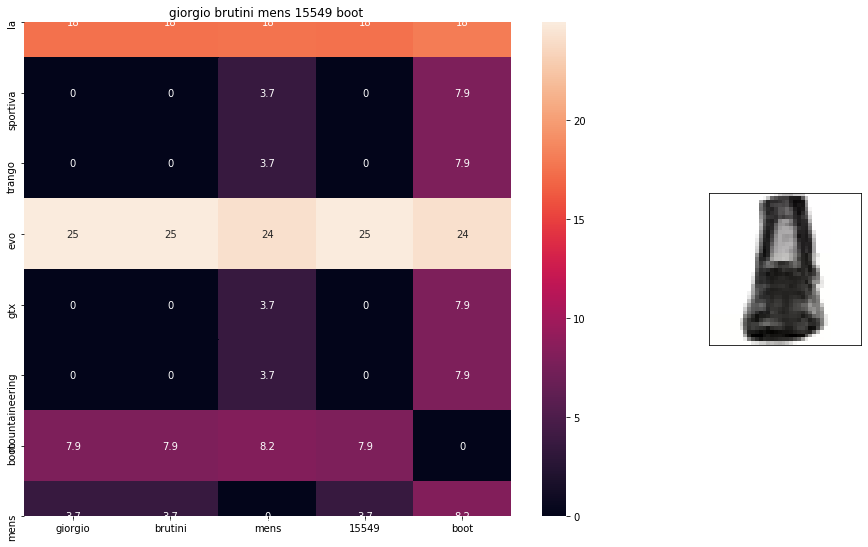

ASIN : B000HGQSHQ
Brand : Giorgio Brutini
euclidean distance from input : 0.5438856


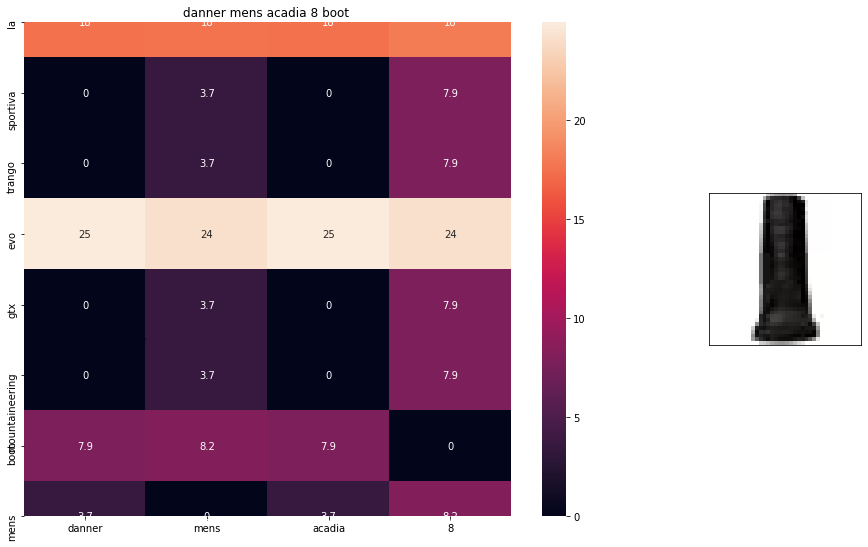

ASIN : B0002L4KA8
Brand : Danner
euclidean distance from input : 0.5438856


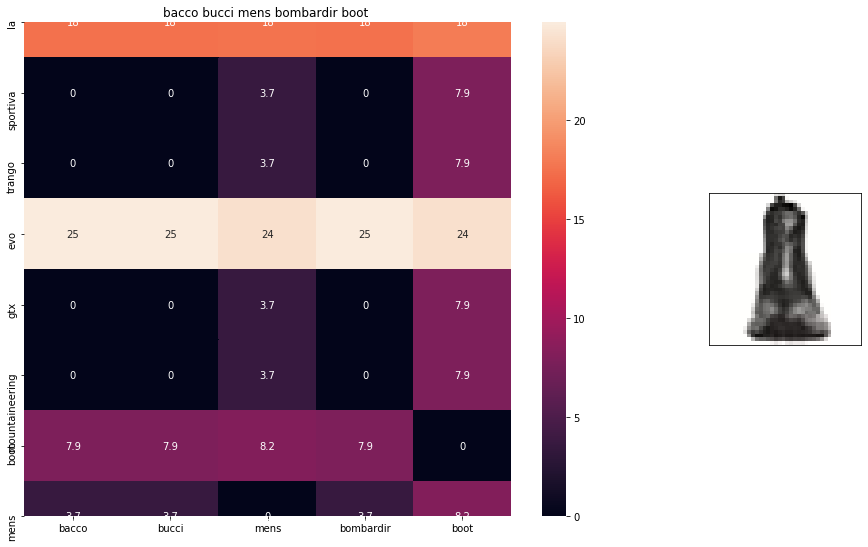

ASIN : B000AY8D32
Brand : Bacco Bucci
euclidean distance from input : 0.5438856


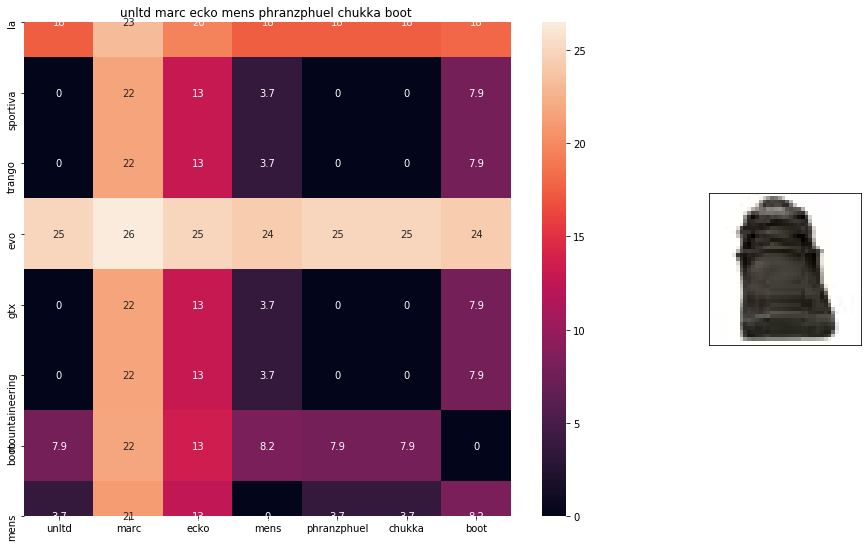

ASIN : B000GJT3KS
Brand : ecko unltd by Marc Ecko
euclidean distance from input : 0.5519371


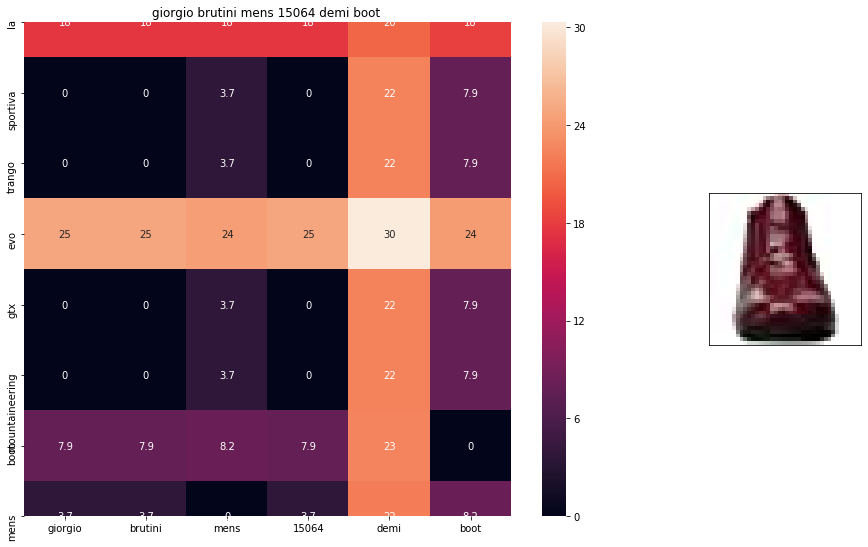

ASIN : B000B3XBIE
Brand : Giorgio Brutini
euclidean distance from input : 0.5727056


In [52]:
weighted_w2v_model(4561,20)